# Loan Default Prediction: Step-by-Step Guide

This notebook will walk you through:
- Loading and cleaning data
- Encoding categorical variables
- Splitting data for training and testing
- Training a Logistic Regression model
- Evaluating accuracy
- Visualizing results with a confusion matrix

Each step is explained for beginners in machine learning.

In [1]:
# Loading train and test data
import pandas as pd
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Cleaning missing values
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3]:
# Encoding categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols)
train_df_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,120.0,360.0,1.0,Y,False,True,True,...,False,False,False,True,False,True,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,False,True,False,...,True,False,False,True,False,True,False,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,False,True,False,...,False,False,False,True,False,False,True,False,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,...,False,False,False,False,True,True,False,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,False,True,True,...,False,False,False,True,False,True,False,False,False,True


In [4]:
# Train-test spliting
from sklearn.model_selection import train_test_split

# Assuming 'Loan_Status' is the target column in train_df_encoded
X = train_df_encoded.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df_encoded['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((491, 20), (123, 20))

In [5]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.79


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 600x600 with 0 Axes>

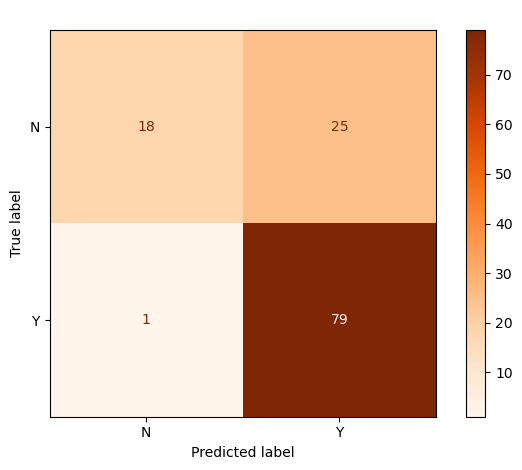

<Figure size 640x480 with 0 Axes>

In [6]:
# Ploting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6), facecolor='black')
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, cmap='Oranges')
plt.title('Confusion Matrix: Loan Default Prediction', color='white')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()
plt.savefig('loan default prediction.png')